In [28]:
#Reading Data Files and data cleaning

import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/Users/nchatterjee/Desktop/Berkley_ML/Module_5/data/coupons.csv')

# Clean the data (handling missing values and renaming 'passanger' to 'passenger')
data_cleaned = data.dropna()  # Dropping rows with missing values
data_cleaned = data_cleaned.rename(columns={'passanger': 'passenger'}) #Incorrect spelling in the input csv

# Convert the 'Y' column to a categorical type (or string) to avoid legend issues
data_cleaned['Y'] = data_cleaned['Y'].astype(str)

# Check the cleaned data
data_cleaned.info()
data_cleaned.head()



<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 1237 to 8297
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           108 non-null    object
 1   passenger             108 non-null    object
 2   weather               108 non-null    object
 3   temperature           108 non-null    int64 
 4   time                  108 non-null    object
 5   coupon                108 non-null    object
 6   expiration            108 non-null    object
 7   gender                108 non-null    object
 8   age                   108 non-null    object
 9   maritalStatus         108 non-null    object
 10  has_children          108 non-null    int64 
 11  education             108 non-null    object
 12  occupation            108 non-null    object
 13  income                108 non-null    object
 14  car                   108 non-null    object
 15  Bar                   108 non-null    obj

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1237,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1238,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,0
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1240,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,1,0,0,1,0
1241,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1


Descriptive Statistics

In [29]:
# Summary statistics for categorical variables
categorical_columns = ['destination', 'passenger', 'weather', 'coupon']
for col in categorical_columns:
    print(f"\nDistribution for {col}:")
    print(data_cleaned[col].value_counts())



Distribution for destination:
destination
No Urgent Place    62
Work               27
Home               19
Name: count, dtype: int64

Distribution for passenger:
passenger
Alone        56
Friend(s)    40
Kid(s)       12
Name: count, dtype: int64

Distribution for weather:
weather
Sunny    88
Snowy    12
Rainy     8
Name: count, dtype: int64

Distribution for coupon:
coupon
Coffee House             37
Restaurant(<20)          25
Carry out & Take away    19
Restaurant(20-50)        14
Bar                      13
Name: count, dtype: int64


Data EDA

In [21]:
# Display basic information about the dataset
data_cleaned.info()

# Show the first few rows of the dataset for inspection
data_cleaned.head()

# Checking for missing values
missing_values = data_cleaned.isnull().sum()

# Show summary statistics for numerical columns
data_cleaned.describe()

# Show the unique values in categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).nunique()

# Display the results for missing values and unique categorical values
missing_values, categorical_columns



<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 1237 to 8297
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           108 non-null    object
 1   passenger             108 non-null    object
 2   weather               108 non-null    object
 3   temperature           108 non-null    int64 
 4   time                  108 non-null    object
 5   coupon                108 non-null    object
 6   expiration            108 non-null    object
 7   gender                108 non-null    object
 8   age                   108 non-null    object
 9   maritalStatus         108 non-null    object
 10  has_children          108 non-null    int64 
 11  education             108 non-null    object
 12  occupation            108 non-null    object
 13  income                108 non-null    object
 14  car                   108 non-null    object
 15  Bar                   108 non-null    obj

(destination             0
 passenger               0
 weather                 0
 temperature             0
 time                    0
 coupon                  0
 expiration              0
 gender                  0
 age                     0
 maritalStatus           0
 has_children            0
 education               0
 occupation              0
 income                  0
 car                     0
 Bar                     0
 CoffeeHouse             0
 CarryAway               0
 RestaurantLessThan20    0
 Restaurant20To50        0
 toCoupon_GEQ5min        0
 toCoupon_GEQ15min       0
 toCoupon_GEQ25min       0
 direction_same          0
 direction_opp           0
 Y                       0
 dtype: int64,
 destination             3
 passenger               3
 weather                 3
 time                    5
 coupon                  5
 expiration              2
 gender                  2
 age                     3
 maritalStatus           2
 education               3
 occupation  

Data Visualization

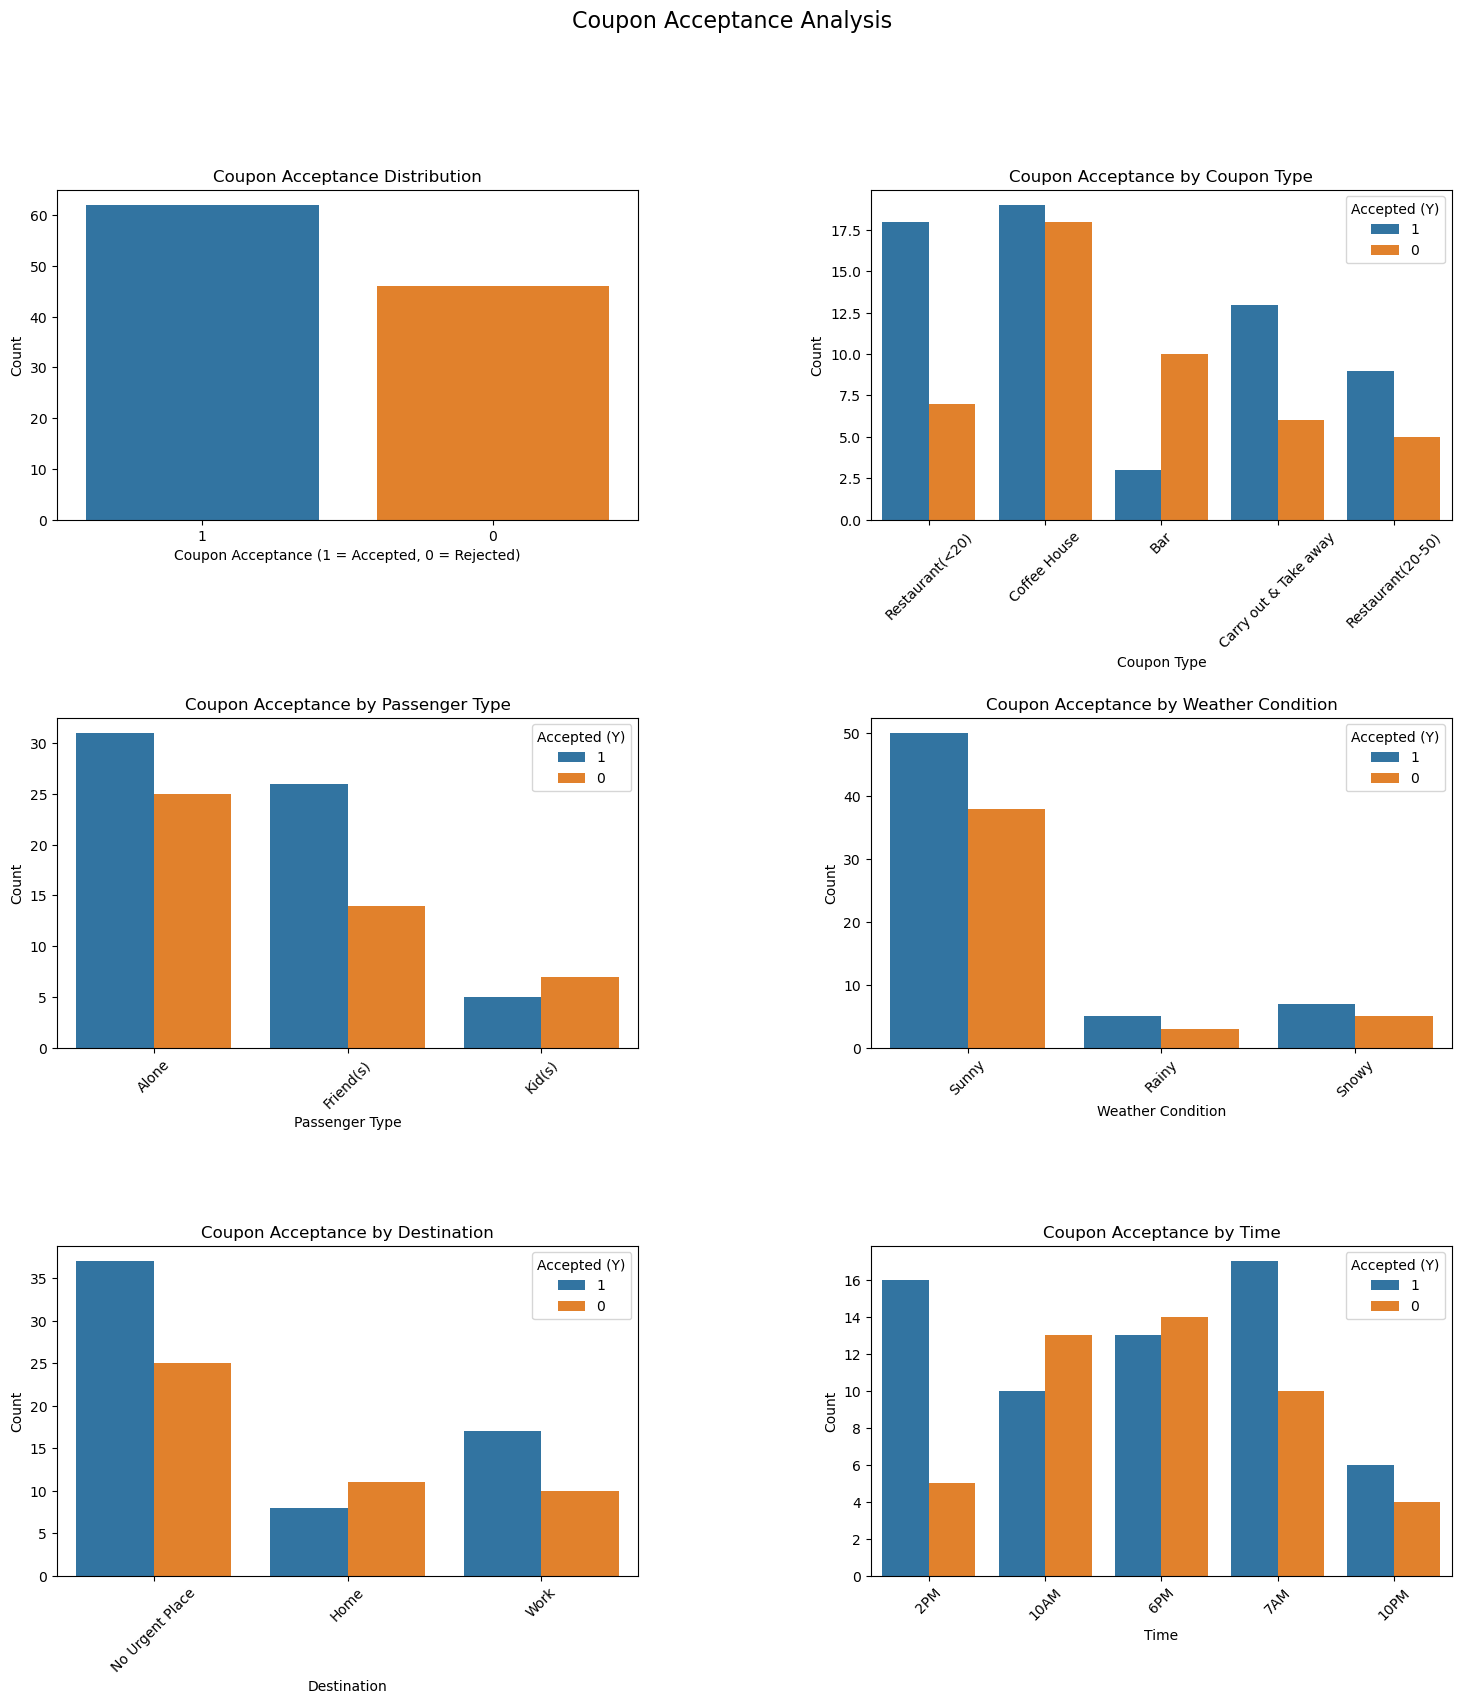

In [30]:
# Create subplots with a grid layout (3 rows and 3 columns) to accommodate the new 'time' plot
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# Adjust the layout of the subplots by increasing the padding
plt.subplots_adjust(hspace=0.6, wspace=0.4)

# Add a common title for the entire figure
fig.suptitle('Coupon Acceptance Analysis', fontsize=16)

# Plot 1: Coupon Acceptance Distribution
sns.countplot(x='Y', data=data_cleaned, ax=axs[0, 0])
axs[0, 0].set_title('Coupon Acceptance Distribution')
axs[0, 0].set_xlabel('Coupon Acceptance (1 = Accepted, 0 = Rejected)')
axs[0, 0].set_ylabel('Count')

# Plot 2: Coupon Acceptance by Coupon Type
sns.countplot(x='coupon', hue='Y', data=data_cleaned, ax=axs[0, 1])
axs[0, 1].set_title('Coupon Acceptance by Coupon Type')
axs[0, 1].set_xlabel('Coupon Type')
axs[0, 1].set_ylabel('Count')
axs[0, 1].legend(title='Accepted (Y)')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Coupon Acceptance by Passenger Type
sns.countplot(x='passenger', hue='Y', data=data_cleaned, ax=axs[1, 0])
axs[1, 0].set_title('Coupon Acceptance by Passenger Type')
axs[1, 0].set_xlabel('Passenger Type')
axs[1, 0].set_ylabel('Count')
axs[1, 0].legend(title='Accepted (Y)')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Coupon Acceptance by Weather Condition
sns.countplot(x='weather', hue='Y', data=data_cleaned, ax=axs[1, 1])
axs[1, 1].set_title('Coupon Acceptance by Weather Condition')
axs[1, 1].set_xlabel('Weather Condition')
axs[1, 1].set_ylabel('Count')
axs[1, 1].legend(title='Accepted (Y)')
axs[1, 1].tick_params(axis='x', rotation=45)

# Plot 5: Coupon Acceptance by Destination
sns.countplot(x='destination', hue='Y', data=data_cleaned, ax=axs[2, 0])
axs[2, 0].set_title('Coupon Acceptance by Destination')
axs[2, 0].set_xlabel('Destination')
axs[2, 0].set_ylabel('Count')
axs[2, 0].legend(title='Accepted (Y)')
axs[2, 0].tick_params(axis='x', rotation=45)

# Plot 6: Coupon Acceptance by Time
sns.countplot(x='time', hue='Y', data=data_cleaned, ax=axs[2, 1])
axs[2, 1].set_title('Coupon Acceptance by Time')
axs[2, 1].set_xlabel('Time')
axs[2, 1].set_ylabel('Count')
axs[2, 1].legend(title='Accepted (Y)')
axs[2, 1].tick_params(axis='x', rotation=45)

# Save the figure as an image (e.g., PNG format)
fig.savefig('coupon_acceptance_analysis.png', dpi=300, bbox_inches='tight')

# Display the subplots
plt.show()


# Summary of Findings:

### 1. Coupon Acceptance Distribution
- From the analysis, it is observed that a higher percentage of customers accept the coupons than reject them. This shows a positive general response to receiving coupons during driving situations.

### 2. Coupon Acceptance by Coupon Type
- **Coffee House** coupons have the highest acceptance rate among customers, followed by **Carry Out & Takeaway** coupons.
- **Bar** coupons have the lowest acceptance rate, indicating that customers are less inclined to accept coupons for bars compared to other types of coupons.
- **Restaurant (<$20)** coupons have a moderate acceptance rate, and similarly, **Restaurant ($20-$50)** coupons see fewer acceptances.

### 3. Coupon Acceptance by Passenger Type
- Customers driving **alone** have a slightly higher acceptance rate compared to those with **friends** or **kids**. However, passengers in the car do not dramatically alter the likelihood of coupon acceptance.
- Customers driving with **kids** show the lowest coupon acceptance rates, which might suggest that those with children are less likely to take advantage of a coupon due to other factors, such as time constraints or child-related (more number of heads to feed) concerns.

### 4. Coupon Acceptance by Weather Condition
- Weather plays a role in coupon acceptance:
  - **Sunny** days have a much higher acceptance rate compared to **rainy** or **snowy** conditions.
  - This indicates that people are more likely to accept and potentially use a coupon when the weather is pleasant, possibly due to more favorable driving conditions or an inclination to engage in social activities.

### 5. Coupon Acceptance by Destination
- The highest acceptance rates occur when the driver has **No Urgent Place** to be, which implies that people are more willing to take advantage of a coupon when they are not in a hurry.
- For drivers heading to **work**, there is a lower acceptance rate, suggesting that drivers heading to professional commitments are less likely to use coupons.

### 6. Coupon Acceptance by Time of Day
- **2 PM** and **6 PM** see higher coupon acceptance rates, suggesting that the afternoon and early evening are peak times for coupon usage.
- **10 PM** shows the lowest acceptance rate, which may indicate that customers are less likely to accept or use coupons late in the evening.
- **7 AM** and **10 AM** have moderate acceptance rates, which may reflect more willingness to use coupons in the morning, especially for coffee houses.

## Recommendations:
- **Focus on distributing Coffee House coupons**: They have the highest acceptance rate, especially during the afternoon and early evening when people may be looking for a break or social engagement.
- **Target coupons when the weather is sunny**: Coupons are more likely to be accepted on sunny days, so businesses may want to ramp up their marketing efforts during good weather.
- **Offer time-sensitive coupons**: Since acceptance is highest during the mid-afternoon (2 PM) and early evening (6 PM), distributing coupons that are valid during these hours could increase redemption rates.
- **Consider destination-based coupon distribution**: People heading to non-urgent destinations are more likely to accept coupons. Businesses could explore geo-targeted coupons for customers not rushing to work or a similar destination.
